In [13]:
%matplotlib inline
seed = 10
dim = 2
%run -i billiard_defs.py

R_particle = 1
R_scatter = 10
R = R_particle + R_scatter
gap_crit = (2/np.sqrt(3) - 1) * R
gap = 0.7 * gap_crit

x_0 = R + gap
y_0 = np.sqrt(3) * x_0

wall = [FlatWall(dim=dim, base_point=[-x_0, 0], normal=[1, 0], tangents=[0, y_0], wp_collision_law='wrap', wrap_dim=0, wrap_wall=1)
        ,FlatWall(dim=dim, base_point=[x_0, 0], normal=[-1, 0], tangents=[0, -y_0], wp_collision_law='wrap', wrap_dim=0, wrap_wall=0)
        ,FlatWall(dim=dim, base_point=[0, -y_0], normal=[0, 1], tangents=[-x_0, 0], wp_collision_law='wrap', wrap_dim=1, wrap_wall=3)
        ,FlatWall(dim=dim, base_point=[0, y_0], normal=[0, -1], tangents=[x_0, 0], wp_collision_law='wrap', wrap_dim=1, wrap_wall=2)
        ,SphereWall(dim=dim, base_point=[0,0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, -y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[-x_0, y_0], radius=R_scatter, gap_pad=R_particle)
        ,SphereWall(dim=dim, base_point=[x_0, y_0], radius=R_scatter, gap_pad=R_particle)
       ]
for (i, w) in enumerate(wall):
    w.idx = i

x=v=s = None
# x = [[x_0/2, y_0/2], [-x_0/2, y_0/2], [-x_0/2, -y_0/2], [x_0/2, -y_0/2]]

part = Particles(max_steps=50, cell_size=[x_0, y_0], dim=dim, num=4, mass=3, radius=R_particle)
part.set_pos_init(x)
part.set_vel_init(v)
part.set_spin_init(s)
part.set_orient_init()

run_trial(wall, part)

smoother(part, min_frames=1)
anim = animate_now(num_frames=10, fps=60)


smoother(part, min_frames=None)
interactive_plot()

# anim
# if anim.save_count <= 500:
#     display(HTML(anim.to_jshtml()))
# else:
#     anim.save('anim.mp4')



HBox(children=(VBox(children=(BoundedIntText(value=1, continuous_update=True, layout=Layout(width='150px'), max=99, min=1), IntSlider(value=1, layout=Layout(width='150px'), max=99, min=1, readout=False), Play(value=1, layout=Layout(width='150px'), max=99, min=1))), Output()))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets
%matplotlib qt

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.func, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.22, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='a')
        self.button_back = matplotlib.widgets.Button(bax, label='b')
        self.button_stop = matplotlib.widgets.Button(sax, label='c')
        self.button_forward = matplotlib.widgets.Button(fax, label='d')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='e')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)

### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

ImportError: Matplotlib qt-based backends require an external PyQt4, PyQt5,
PySide or PySide2 package to be installed, but it was not found.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets
# %matplotlib notebook

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.func, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.22, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='a')
        self.button_back = matplotlib.widgets.Button(bax, label='b')
        self.button_stop = matplotlib.widgets.Button(sax, label='c')
        self.button_forward = matplotlib.widgets.Button(fax, label='d')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='e')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)

### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()
# ani

0

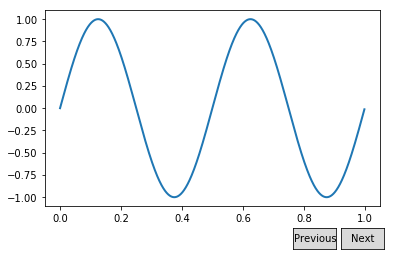

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

# plt.show()

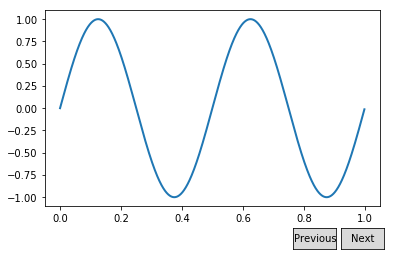

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

In [58]:
samp.val

1.540000000000001

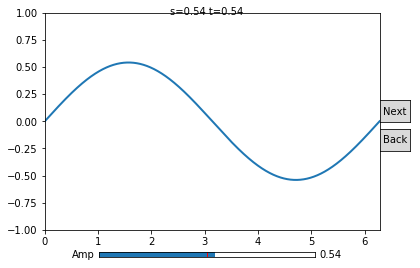

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0,TWOPI,-1,1])
time_label = fig.text(0.5, 0.90, 's=0 t=0.00', ha='center', va='top', fontsize=10)

axamp = plt.axes([0.25, .03, 0.50, 0.02])
axprev = plt.axes([0.9, 0.4, 0.07, 0.075])
axnext = plt.axes([0.9, 0.5, 0.07, 0.075])
# Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)
bnext = Button(axnext, 'Next')
bprev = Button(axprev, 'Back')


# Animation controls
is_manual = False # True if user has taken control of the animation
interval = 100 # ms, time between animation frames
loop_len = 5.0 # seconds per loop
scale = interval / 1000 / loop_len

def update_slider(val):
    global is_manual
    is_manual=True
    update(val)

def update(val):
    # update curve
    l.set_ydata(val*np.sin(t))
    time_label.set_text('s={} t={:.2f}'.format(val, val))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def update_plot(num):
    global is_manual
    if is_manual:
        return l, # don't change

    val = (samp.val + scale) % samp.valmax
    samp.set_val(val)
    is_manual = False # the above line called update_slider, so we need to reset this
    return l,

def on_click(event):
    # Check where the click happened
    (xm,ym),(xM,yM) = samp.label.clipbox.get_points()
    if xm < event.x < xM and ym < event.y < yM:
        # Event happened within the slider, ignore since it is handled in update_slider
        return
    else:
        # user clicked somewhere else on canvas = unpause
        global is_manual
        is_manual=False

# call update function on slider value change
samp.on_changed(update_slider)
bnext.on_clicked(update_plot(2))
bprev.on_clicked(callback.prev)

fig.canvas.mpl_connect('button_press_event', on_click)

ani = animation.FuncAnimation(fig, update_plot, interval=interval)
# ani
plt.show()
ani
# ani.save('wave.mp4')

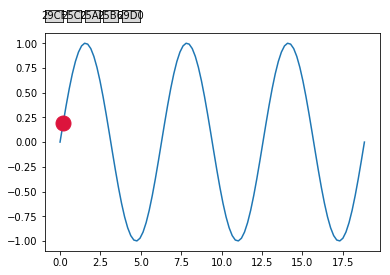

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.func, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.22, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='29CF')
        self.button_back = matplotlib.widgets.Button(bax, label='25C0')
        self.button_stop = matplotlib.widgets.Button(sax, label='25A0')
        self.button_forward = matplotlib.widgets.Button(fax, label='25B6')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='29D0')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)

### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.func, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.22, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        self.button_oneback = matplotlib.widgets.Button(playerax, label=ur'$\u29CF$')
        self.button_back = matplotlib.widgets.Button(bax, label=ur'$\u25C0$')
        self.button_stop = matplotlib.widgets.Button(sax, label=ur'$\u25A0$')
        self.button_forward = matplotlib.widgets.Button(fax, label=ur'$\u25B6$')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label=ur'$\u29D0$')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)

### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

SyntaxError: invalid syntax (<ipython-input-30-9276ae8942ff>, line 71)

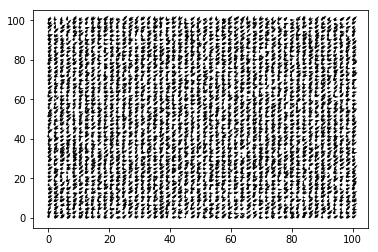

In [20]:
import numpy as np
X, Y = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))
q = plt.quiver(X, Y , np.random.rand(100, 100), np.random.rand(100, 100))
plt.draw()
plt.pause(2)
q.set_offsets(q.get_offsets() * np.array([1, .5]))
plt.draw()
plt.show()

In [29]:
help(Q)

Help on Quiver in module matplotlib.quiver object:

class Quiver(matplotlib.collections.PolyCollection)
 |  Specialized PolyCollection for arrows.
 |  
 |  The only API method is set_UVC(), which can be used
 |  to change the size, orientation, and color of the
 |  arrows; their locations are fixed when the class is
 |  instantiated.  Possibly this method will be useful
 |  in animations.
 |  
 |  Much of the work in this class is done in the draw()
 |  method so that as much information as possible is available
 |  about the plot.  In subsequent draw() calls, recalculation
 |  is limited to things that might have changed, so there
 |  should be no performance penalty from putting the calculations
 |  in the draw() method.
 |  
 |  Method resolution order:
 |      Quiver
 |      matplotlib.collections.PolyCollection
 |      matplotlib.collections._CollectionWithSizes
 |      matplotlib.collections.Collection
 |      matplotlib.artist.Artist
 |      matplotlib.cm.ScalarMappable
 |      

/usr/lib64/python3.4/dist-packages/matplotlib/collections.py:459: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if offset_position not in ('screen', 'data'):
Traceback (most recent call last):
  File "/usr/lib64/python3.4/dist-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib64/python3.4/dist-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib64/python3.4/dist-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/usr/lib64/python3.4/dist-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/lib64/python3.4/dist-packages/matplotlib/animation.py", line 1814, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-28-278fb7745809>", line 25, in update_qui

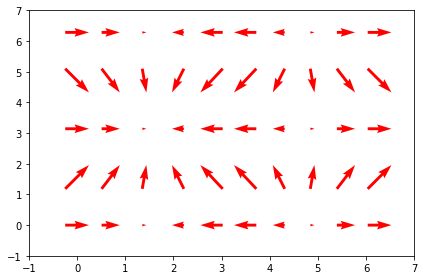

/usr/lib64/python3.4/dist-packages/matplotlib/collections.py:459: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if offset_position not in ('screen', 'data'):


ValueError: offset_position must be 'screen' or 'data'

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)
    
    Q.set_offset_position(X + num*0.1)#, Y + num*0.1)
    Q.set_
    

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=50, blit=False)
fig.tight_layout()
plt.show()
anim